<a href="https://colab.research.google.com/github/SanikaPanchabhai/19-ML-Practical/blob/main/ML5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install necessary libraries
!pip install pandas scikit-learn matplotlib seaborn

Saving Mall_Customers.csv to Mall_Customers (1).csv


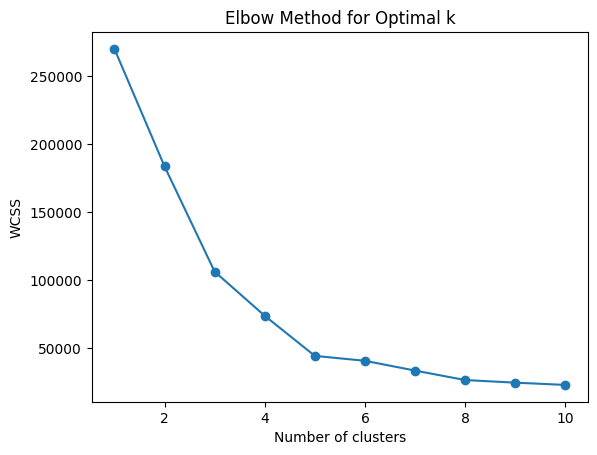

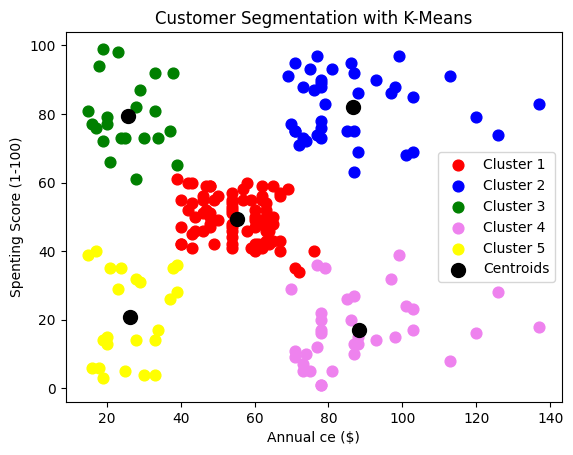

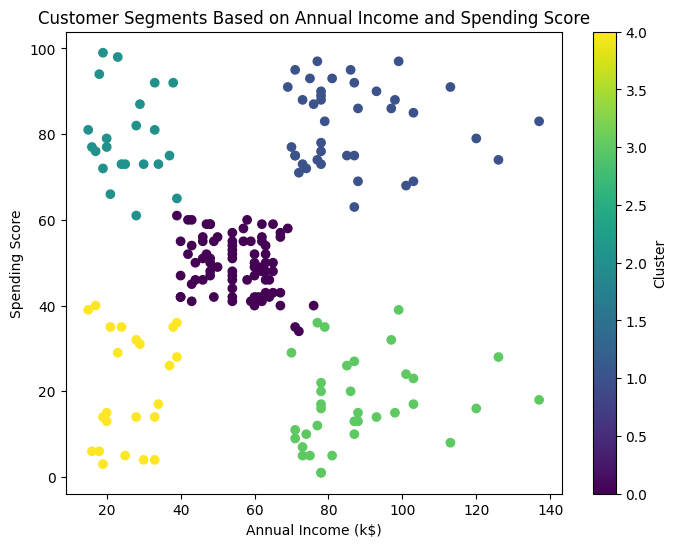

In [ ]:
# Load the dataset
from google.colab import files
uploaded = files.upload()
# Function to load CSV file using Pandas
import pandas as pd
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()


import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import sklearn
# Changing the column indices to 3 and 4 to select the last two columns.
x = dataset.iloc[:, [3, 4]].values
# Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(1, 11):
    # Indented block for the 'for' loop starts here
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    # The variable 'x' was defined earlier and holds the data for clustering.
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    # Indented block ends here

# Plotting the results
plt.plot(range(1, 11), wcss,marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()


# Fit the KMeans model and predict cluster labels
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(x)
# Plotting the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=60, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=60, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=60, c='green', label='Cluster 3')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s=60, c='violet', label='Cluster 4')
plt.scatter(x[y_kmeans == 4, 0], x[y_kmeans == 4, 1], s=60, c='yellow', label='Cluster 5')
# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label =
'Centroids')
plt.xlabel('Annual ce ($)') # Labels and Title
plt.ylabel('Spenting Score (1-100)')
plt.title("Customer Segmentation with K-Means")
plt.legend()
plt.show()



# Visualizing clusters on a 2D plot (using 'Annual_Income_(k$)' vs. 'Spending_Score')
plt.figure(figsize=(8, 6))
plt.scatter(dataset['Annual Income (k$)'], dataset['Spending Score (1-100)'], c=y_kmeans, cmap='viridis')
plt.title('Customer Segments Based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.colorbar(label='Cluster')
plt.show()

BONUS ASSIGNMENT


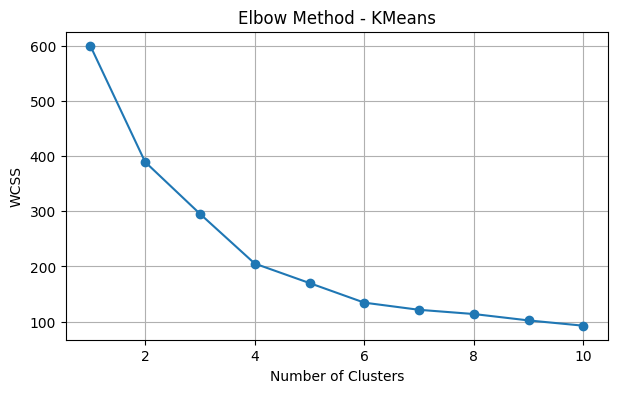

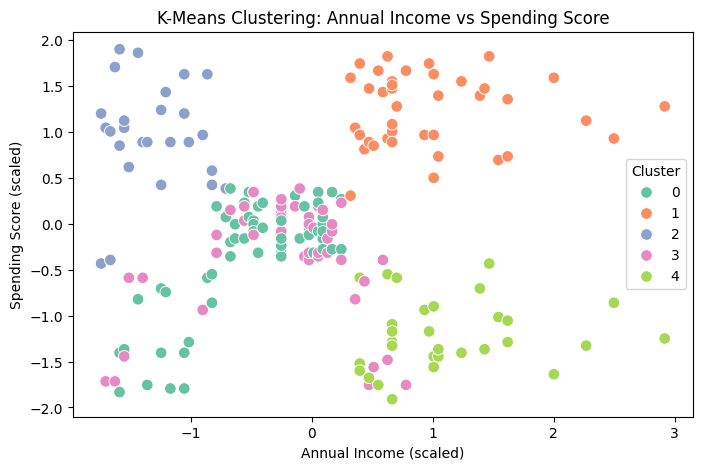

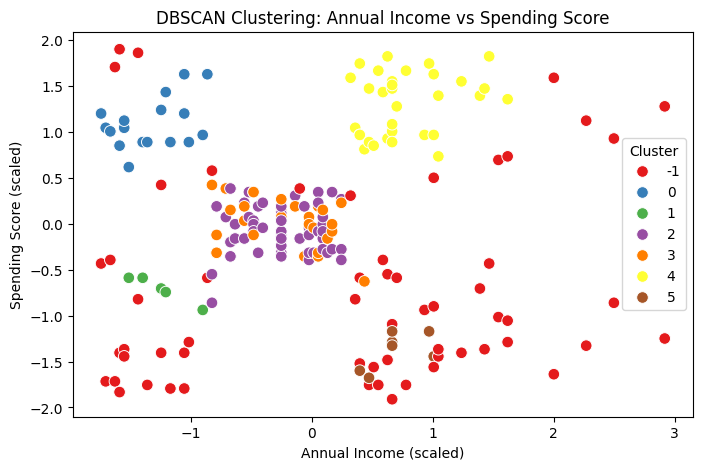

Silhouette Score (K-Means): 0.408
Silhouette Score (DBSCAN): 0.482


In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Load dataset
df = pd.read_csv('Mall_Customers.csv')
df = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Preprocessing
df = df.dropna()
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# ------------------------------
# K-MEANS CLUSTERING
# ------------------------------
# Elbow Method to find optimal k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method - KMeans')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

# Apply KMeans with chosen k (e.g., 5)
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
k_labels = kmeans.fit_predict(scaled_data)

# Add KMeans labels to DataFrame
df['KMeans_Cluster'] = k_labels

# Visualize KMeans clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_data[:, 1], y=scaled_data[:, 2],
    hue=k_labels, palette='Set2', s=70
)
plt.title('K-Means Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

# ------------------------------
# DBSCAN CLUSTERING
# ------------------------------
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data)

# Add DBSCAN labels
df['DBSCAN_Cluster'] = db_labels

# Visualize DBSCAN clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=scaled_data[:, 1], y=scaled_data[:, 2],
    hue=db_labels, palette='Set1', s=70
)
plt.title('DBSCAN Clustering: Annual Income vs Spending Score')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.legend(title='Cluster')
plt.show()

# ------------------------------
# SILHOUETTE SCORE COMPARISON
# ------------------------------
# Exclude noise points for DBSCAN score
filtered_data = scaled_data[df['DBSCAN_Cluster'] != -1]
filtered_labels = df['DBSCAN_Cluster'][df['DBSCAN_Cluster'] != -1]

# Calculate Silhouette Scores
kmeans_score = silhouette_score(scaled_data, k_labels)
dbscan_score = silhouette_score(filtered_data, filtered_labels)

print("Silhouette Score (K-Means):", round(kmeans_score, 3))
print("Silhouette Score (DBSCAN):", round(dbscan_score, 3))
